In [19]:
import matplotlib.pyplot as plt
import cv2
import fiftyone as fo
import numpy as np

%matplotlib widget

dataset = fo.load_dataset("RumexWeeds")

In [21]:
random_view = dataset.take(100)

r_values = np.empty((0,))
b_values = np.empty((0,)) 
g_values = np.empty((0,)) 

for sample in random_view:
    img = cv2.imread(sample['filepath'])
    b_values = np.append(b_values, img[:, :, 0].flatten())
    g_values = np.append(g_values, img[:, :, 1].flatten())
    r_values = np.append(r_values, img[:, :, 2].flatten())


KeyboardInterrupt: 

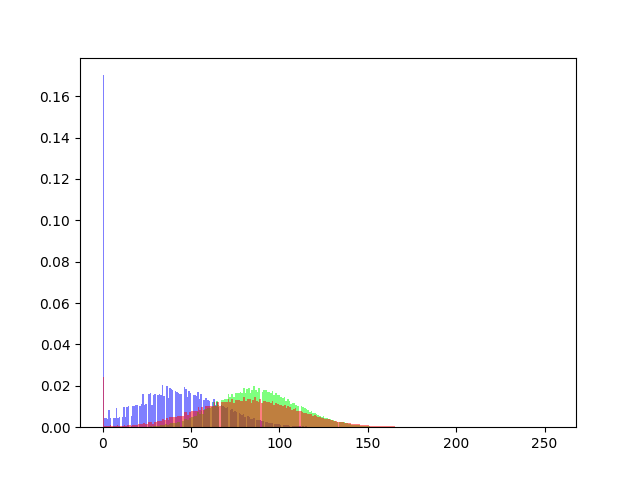

In [20]:
sample = dataset.take(1).first()

img = cv2.imread(sample['filepath'])

fig, ax = plt.subplots(1,1)

_ = ax.hist(img[:,:,0].flatten(), bins=256, color=(0,0,1.0, 0.5), density=True)
_ = ax.hist(img[:,:,1].flatten(), bins=256, color=(0,1.0,0,0.5), density=True)
_ = ax.hist(img[:,:,2].flatten(), bins=256, color=(1.0, 0, 0, 0.5), density=True)

In [12]:
img[:, :, 0]/np.linalg.norm(img[:, :, 0].flatten())

array([[0.00000000e+00, 2.65601138e-05, 2.25760967e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.85920796e-04, 5.31202275e-05, 0.00000000e+00, ...,
        1.32800569e-05, 0.00000000e+00, 0.00000000e+00],
       [7.43683186e-04, 7.03843015e-04, 6.64002844e-04, ...,
        0.00000000e+00, 6.10882617e-04, 6.10882617e-04],
       ...,
       [2.65601138e-05, 0.00000000e+00, 1.06240455e-04, ...,
        6.64002844e-05, 6.64002844e-05, 6.64002844e-05],
       [1.46080626e-04, 1.19520512e-04, 3.98401707e-05, ...,
        3.98401707e-04, 5.57762389e-04, 5.57762389e-04],
       [1.46080626e-04, 1.19520512e-04, 3.98401707e-05, ...,
        3.98401707e-04, 5.57762389e-04, 5.57762389e-04]])

In [1]:
np.arange(256)

NameError: name 'np' is not defined

In [11]:
img.shape

(1200, 1920, 3)